    Pipeline Used:
       Stopwords-number removal 
       Stemming
       Countvectors
       Many algorithms.
    
    

In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
from nltk.stem.porter import PorterStemmer
import os
import json
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #support vector classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
import numpy as np


# Import data

In [3]:
path=os.getcwd()
new_path=path.replace("Text classification pipelines","Data to use\\movie_data_newest.csv")
new_path
df=pd.read_csv(new_path)


In [4]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [5]:
df["sentiment"].value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [6]:
len(df["sentiment"].value_counts())

2

In [7]:
df.shape

(50000, 2)

In [8]:

df.tail(3)


,review,sentiment
49997,I don't even know where to begin on this one. ...,0
49998,Richard Tyler is a little boy who is scared of...,0
49999,I waited long to watch this movie. Also becaus...,1


In [9]:
labels=df["sentiment"].copy() #capture targets

In [10]:
df.head()

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


# Process text data

In [11]:
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


# 1)Stopword removal

In [12]:
stop=stopwords.words('english') #Nltk stopwords
print(stop)
stop.append("Hi")  
stop.append("Hello")
stop.append("Hiya")
stop.append("hello")
stop.append("Anyone")
stop.append("All")
stop.append("I")
stop.append("hi")
stop.append("this")
stop.append("My")
stop.append("Everyone")
stop.append("everyone")
stop.append("Me")
stop.append("Im")
stop.append("Ive")
stop.append("We")
stop.append("thank")
stop.append("Thank")
stop.append("Would")
stop.append("would")
stop.append("Afternoon")
stop.append("There")
len(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

201

In [13]:
stop.sort()
stop

['Afternoon',
 'All',
 'Anyone',
 'Everyone',
 'Hello',
 'Hi',
 'Hiya',
 'I',
 'Im',
 'Ive',
 'Me',
 'My',
 'Thank',
 'There',
 'We',
 'Would',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'everyone',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'hello',
 'her',
 'here',
 'hers',
 'herself',
 'hi',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 

In [14]:
def is_number(s):  #Function helps removing numbers
    try:
        float(s)
        return True
    except ValueError:
        return False

In [15]:
#Define text-processing functions
translator = str.maketrans('', '', string.punctuation)
def tokenize(text):
    new_text=text.translate(translator)
    return [word for word in new_text.split()]

def stop_word_remove(text):
    return [w for w in tokenize(text) if w not in stop]



discarded_words=[]            
def stop_word_remove_and_numbers(text):
    list_of_tokens=tokenize(text) #Tokenize the string that came in as a string
    return_list=[]  #list to return 
    for token in list_of_tokens:
        if token.lower() not in stop and is_number(token)==False:
            return_list.append(token)
        else:
            #print(token)
            discarded_words.append(token)
    #return [w for w in tokenize(text) if w not in stop]
    return return_list 
    

In [16]:
intermidiate_frame=df["review"].apply(stop_word_remove_and_numbers)

# 2) Stemming

In [17]:
porter=PorterStemmer()
def stem(text):
    "Stemms and tokenizes the text that is coming in "
    #This stemmer at least works
    return [porter.stem(word) for word in text]
 

In [18]:
processed_Dataframe=intermidiate_frame.apply(stem)

In [19]:
def join_to_string(text_list):
    return " ".join(text_list)

In [20]:
final_df=processed_Dataframe.apply(join_to_string)

In [21]:
final_df.head(5) #df with processed data

0    teenag martha moxley maggi grace move highclas...
1    OK realli like kri kristofferson usual easi go...
2    spoiler read think watch movi although wast ti...
3    peopl seen wonder movi im sure thet like much ...
4    recent bought dvd forget much hate movi versio...
Name: review, dtype: object

In [22]:
df["review"].head()

0    In 1974, the teenager Martha Moxley (Maggie Gr...
1    OK... so... I really like Kris Kristofferson a...
2    ***SPOILER*** Do not read this, if you think a...
3    hi for all the people who have seen this wonde...
4    I recently bought the DVD, forgetting just how...
Name: review, dtype: object

In [23]:
final_df.iloc[0]

'teenag martha moxley maggi grace move highclass area bell greenwich connecticut mischief night eve halloween murder backyard hous murder remain unsolv twentytwo year later writer mark fuhrman christoph meloni former LA detect fallen disgrac perjuri OJ simpson trial move idaho decid investig case partner stephen week andrew mitchel purpos write book local squirm welcom support retir detect steve carrol robert forster charg investig 70 discov crimin net power money cover murderbr br murder greenwich good TV movi true stori murder fifteen year old girl commit wealthi teenag whose mother kennedi power rich famili use influenc cover murder twenti year howev snoopi detect convict perjur disgrac abl disclos hideou crime commit screenplay show investig mark last day martha parallel lack emot dramat vote sevenbr br titl brazil avail'

In [25]:
df["review"].iloc[0]

'In 1974, the teenager Martha Moxley (Maggie Grace) moves to the high-class area of Belle Haven, Greenwich, Connecticut. On the Mischief Night, eve of Halloween, she was murdered in the backyard of her house and her murder remained unsolved. Twenty-two years later, the writer Mark Fuhrman (Christopher Meloni), who is a former LA detective that has fallen in disgrace for perjury in O.J. Simpson trial and moved to Idaho, decides to investigate the case with his partner Stephen Weeks (Andrew Mitchell) with the purpose of writing a book. The locals squirm and do not welcome them, but with the support of the retired detective Steve Carroll (Robert Forster) that was in charge of the investigation in the 70\'s, they discover the criminal and a net of power and money to cover the murder.<br /><br />"Murder in Greenwich" is a good TV movie, with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a Kennedy. The powerful and rich famil

In [26]:
labels=df['sentiment'].copy()

In [29]:
f_df=pd.DataFrame(final_df)

In [30]:
f_df.head()

,review
0,teenag martha moxley maggi grace move highclas...
1,OK realli like kri kristofferson usual easi go...
2,spoiler read think watch movi although wast ti...
3,peopl seen wonder movi im sure thet like much ...
4,recent bought dvd forget much hate movi versio...


In [31]:
f_df['sentiment']=labels.copy()

In [32]:
f_df.head()

,review,sentiment
0,teenag martha moxley maggi grace move highclas...,1
1,OK realli like kri kristofferson usual easi go...,0
2,spoiler read think watch movi although wast ti...,0
3,peopl seen wonder movi im sure thet like much ...,1
4,recent bought dvd forget much hate movi versio...,0


In [36]:
f_df.to_excel("processed_data_plus_labels.xlsx")
#save and load resulting dataframe 

In [7]:
final_df=pd.read_excel("processed_data_plus_labels.xlsx")
labels=final_df["sentiment"].copy()

# Transform to word vectors--count vectors (split data first)

In [8]:
vectorizer=CountVectorizer()
X_train, X_test, y_train, y_test = train_test_split(final_df['review'], labels, test_size=0.20, random_state=1,stratify=labels)

In [9]:
vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary

In [10]:
vectors_train

<40000x123574 sparse matrix of type '<class 'numpy.int64'>'
	with 3822351 stored elements in Compressed Sparse Row format>

In [11]:
vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
vectors_test

<10000x123574 sparse matrix of type '<class 'numpy.int64'>'
	with 934457 stored elements in Compressed Sparse Row format>

# Initialize-fit the classifier - train/test split

In [8]:
classifier=LogisticRegression(random_state=1)

In [9]:
classifier.fit(vectors_train,y_train)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Training Accuracy

In [10]:
classifier.score(vectors_train,y_train)

0.994425

In [11]:
predicted_labels=classifier.predict(vectors_train)
names=y_test.unique()

In [12]:
print(metrics.classification_report(y_train, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20000
           1       0.99      0.99      0.99     20000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



# Test the logistic classifier

In [13]:
#Testing accuracy 
classifier.score(vectors_test,y_test) #Accuracy score

0.8829

In [14]:
predicted_labels=classifier.predict(vectors_test)
names=y_test.unique()

In [15]:
#y_test.value_counts()

In [16]:
print(metrics.classification_report(y_test, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      5000
           1       0.87      0.89      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [17]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[4355,  645],
       [ 526, 4474]], dtype=int64)

In [18]:
#yellowbrick confusion matrix

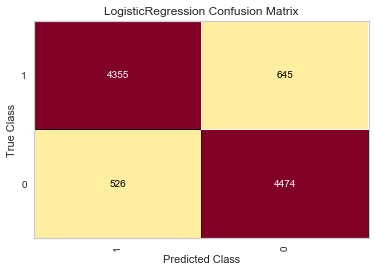

In [19]:
model = LogisticRegression(random_state=1)

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=labels.unique())

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(vectors_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(vectors_test, y_test)

# How did we do?
cm.poof()

# Validate classification results --cross validation Logistic Regression

In [18]:
 from sklearn.model_selection import StratifiedKFold

In [19]:
skf = StratifiedKFold(n_splits=5)
skf.get_n_splits(final_df, labels)
print(skf) 

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)


In [20]:
scores=[]
for train_index, test_index in skf.split(final_df, labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = final_df['review'][train_index], final_df['review'][test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    vectorizer=CountVectorizer()
    vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary
    vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
    
    print(vectors_train.shape)
    print(vectors_test.shape)
    
    classifier=LogisticRegression(random_state=1)
    classifier.fit(vectors_train,y_train)
    print(classifier.score(vectors_test,y_test))
    #scores.append(classifier.score(vectors_train,y_train))
    scores.append(classifier.score(vectors_test,y_test))
    

TRAIN: [ 9929  9931  9932 ... 49997 49998 49999] TEST: [    0     1     2 ... 10053 10056 10057]
(40000, 122464)
(10000, 122464)


C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8779
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [ 9929  9931  9932 ... 20086 20088 20089]
(40000, 123155)
(10000, 123155)
0.8808
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [19904 19906 19907 ... 30008 30010 30015]
(40000, 123318)
(10000, 123318)
0.8868
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [29992 29993 29994 ... 40025 40026 40028]
(40000, 123042)
(10000, 123042)
0.8811
TRAIN: [    0     1     2 ... 40025 40026 40028] TEST: [39967 39972 39974 ... 49997 49998 49999]
(40000, 123169)
(10000, 123169)
0.8798


In [21]:
out_arr = np.asarray(scores) 
out_arr.mean()

0.8812800000000001

# Stohastic solver for support vector machines 

In [9]:
classifier_svm=SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

In [10]:
classifier_svm.fit(vectors_train,y_train) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Training Accuracy 

In [11]:
vectors_train

<40000x123574 sparse matrix of type '<class 'numpy.int64'>'
	with 3822351 stored elements in Compressed Sparse Row format>

In [12]:
classifier_svm.score(vectors_train,y_train)

0.99165

In [13]:
predicted_labels=classifier_svm.predict(vectors_train)

In [14]:
print(metrics.classification_report(y_train, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20000
           1       0.99      0.99      0.99     20000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



# Testing Accuracy

In [15]:
vectors_test

<10000x123574 sparse matrix of type '<class 'numpy.int64'>'
	with 934457 stored elements in Compressed Sparse Row format>

In [16]:
classifier_svm.score(vectors_test,y_test)

0.879

In [17]:
predicted_labels=classifier_svm.predict(vectors_test)

In [18]:
print(metrics.classification_report(y_test, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      5000
           1       0.87      0.90      0.88      5000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [20]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[4303,  697],
       [ 513, 4487]], dtype=int64)

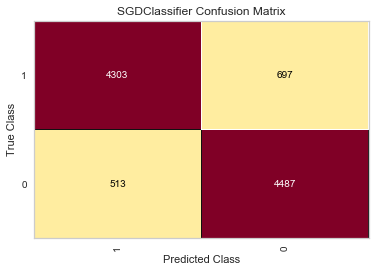

In [19]:
model = SGDClassifier(loss='hinge', penalty='l2', random_state=1,max_iter=1000)

cm = ConfusionMatrix(model, classes=labels.unique())

cm.fit(vectors_train, y_train)

cm.score(vectors_test, y_test)
cm.poof()

In [22]:
scores=[]
for train_index, test_index in skf.split(final_df, labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = final_df['review'][train_index], final_df['review'][test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    vectorizer=CountVectorizer()
    vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary
    vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
    
    print(vectors_train.shape)
    print(vectors_test.shape)
    
    classifier=classifier_svm=SGDClassifier(loss='hinge',penalty='l2', random_state=1,max_iter=1000)
    classifier.fit(vectors_train,y_train)
    print(classifier.score(vectors_test,y_test))
    #scores.append(classifier.score(vectors_train,y_train))
    scores.append(classifier.score(vectors_test,y_test))

TRAIN: [ 9929  9931  9932 ... 49997 49998 49999] TEST: [    0     1     2 ... 10053 10056 10057]
(40000, 122464)
(10000, 122464)
0.8706
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [ 9929  9931  9932 ... 20086 20088 20089]
(40000, 123155)
(10000, 123155)
0.8762
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [19904 19906 19907 ... 30008 30010 30015]
(40000, 123318)
(10000, 123318)
0.8788
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [29992 29993 29994 ... 40025 40026 40028]
(40000, 123042)
(10000, 123042)
0.8714
TRAIN: [    0     1     2 ... 40025 40026 40028] TEST: [39967 39972 39974 ... 49997 49998 49999]
(40000, 123169)
(10000, 123169)
0.8745


In [23]:
out_arr = np.asarray(scores) 
out_arr.mean()

0.8743000000000001

# Support vector machine classifier with kernel

In [12]:
from sklearn.svm import SVC

In [13]:
classifier_svm=SVC(kernel="poly", random_state=1,max_iter=1000)
classifier_svm.fit(vectors_train,y_train) #accuracy
classifier_svm.score(vectors_test,y_test)

C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.4995

In [14]:
predicted_labels=classifier_svm.predict(vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.14      0.00      0.00      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.32      0.50      0.33     10000
weighted avg       0.32      0.50      0.33     10000



In [25]:
scores=[]
for train_index, test_index in skf.split(final_df, labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = final_df['review'][train_index], final_df['review'][test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    vectorizer=CountVectorizer()
    vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary
    vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
    
    print(vectors_train.shape)
    print(vectors_test.shape)
    
    classifier=SVC(kernel="poly", random_state=1,max_iter=1000)
    classifier.fit(vectors_train,y_train)
    print(classifier.score(vectors_test,y_test))
    #scores.append(classifier.score(vectors_train,y_train))
    scores.append(classifier.score(vectors_test,y_test))

TRAIN: [ 9929  9931  9932 ... 49997 49998 49999] TEST: [    0     1     2 ... 10053 10056 10057]
(40000, 122464)
(10000, 122464)


C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.4997
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [ 9929  9931  9932 ... 20086 20088 20089]
(40000, 123155)
(10000, 123155)
0.4999
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [19904 19906 19907 ... 30008 30010 30015]
(40000, 123318)
(10000, 123318)
0.4999
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [29992 29993 29994 ... 40025 40026 40028]
(40000, 123042)
(10000, 123042)
0.5
TRAIN: [    0     1     2 ... 40025 40026 40028] TEST: [39967 39972 39974 ... 49997 49998 49999]
(40000, 123169)
(10000, 123169)
0.5


In [26]:
out_arr = np.asarray(scores) 
out_arr.mean()

0.49990000000000007

In [15]:
classifier_svm=SVC(kernel="rbf", random_state=1,max_iter=1000)
classifier_svm.fit(vectors_train,y_train) #accuracy
classifier_svm.score(vectors_test,y_test)

0.5014

In [16]:
predicted_labels=classifier_svm.predict(vectors_test)
print(metrics.classification_report(y_test, predicted_labels,y_train.unique().sort()))

              precision    recall  f1-score   support

           0       0.77      0.00      0.01      5000
           1       0.50      1.00      0.67      5000

    accuracy                           0.50     10000
   macro avg       0.63      0.50      0.34     10000
weighted avg       0.63      0.50      0.34     10000



In [17]:
classifier_svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=1000, probability=False, random_state=1,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
scores=[]
for train_index, test_index in skf.split(final_df, labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = final_df['review'][train_index], final_df['review'][test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    vectorizer=CountVectorizer()
    vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary
    vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
    
    print(vectors_train.shape)
    print(vectors_test.shape)
    
    classifier=SVC(kernel="rbf", random_state=1,max_iter=1000)
    classifier.fit(vectors_train,y_train)
    print(classifier.score(vectors_test,y_test))
    #scores.append(classifier.score(vectors_train,y_train))
    scores.append(classifier.score(vectors_test,y_test))

TRAIN: [ 9929  9931  9932 ... 49997 49998 49999] TEST: [    0     1     2 ... 10053 10056 10057]
(40000, 122464)
(10000, 122464)


C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\billy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


0.5012
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [ 9929  9931  9932 ... 20086 20088 20089]
(40000, 123155)
(10000, 123155)
0.501
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [19904 19906 19907 ... 30008 30010 30015]
(40000, 123318)
(10000, 123318)
0.5013
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [29992 29993 29994 ... 40025 40026 40028]
(40000, 123042)
(10000, 123042)
0.5003
TRAIN: [    0     1     2 ... 40025 40026 40028] TEST: [39967 39972 39974 ... 49997 49998 49999]
(40000, 123169)
(10000, 123169)
0.5006


In [28]:
out_arr = np.asarray(scores) 
out_arr.mean()

0.50088

# Naive Bayes

In [21]:
classifierNB=MultinomialNB()  #Multinomial model is used along with term frequencies

In [22]:
vectors_train

<40000x123574 sparse matrix of type '<class 'numpy.int64'>'
	with 3822351 stored elements in Compressed Sparse Row format>

In [23]:
classifierNB.fit(vectors_train,y_train) 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Training Accuracy 

In [24]:
classifierNB.score(vectors_train,y_train)

0.905475

In [25]:
predicted_labels=classifierNB.predict(vectors_train)

In [26]:
print(metrics.classification_report(y_train, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     20000
           1       0.93      0.88      0.90     20000

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000



# Testing Accuracy 

In [27]:

classifierNB.score(vectors_test,y_test)

0.8498

In [28]:
classifierNB.fit(vectors_train,y_train)
predicted_labels=classifierNB.predict(vectors_test)

In [29]:
print(metrics.classification_report(y_test, predicted_labels,labels.unique().sort()))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5000
           1       0.87      0.83      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [30]:
#5 fold validation

In [31]:
metrics.confusion_matrix(y_test, predicted_labels)

array([[4356,  644],
       [ 858, 4142]], dtype=int64)

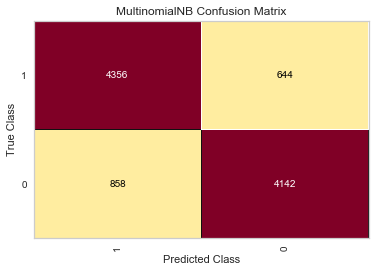

In [32]:
model = MultinomialNB() 

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=labels.unique())


cm.fit(vectors_train, y_train)
cm.score(vectors_test, y_test)
cm.poof()

In [69]:
scores=[]
for train_index, test_index in skf.split(final_df, labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = final_df['review'][train_index], final_df['review'][test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    vectorizer=CountVectorizer()
    vectors_train=vectorizer.fit_transform(X_train) #learn vocabulary
    vectors_test=vectorizer.transform(X_test) #count number of accourances of the tokens learned (from training) in the new documents
    
    print(vectors_train.shape)
    print(vectors_test.shape)
    
    classifier=MultinomialNB() 
    classifier.fit(vectors_train,y_train)
    print(classifier.score(vectors_test,y_test))
    #scores.append(classifier.score(vectors_train,y_train))
    scores.append(classifier.score(vectors_test,y_test))

TRAIN: [ 9929  9931  9932 ... 49997 49998 49999] TEST: [    0     1     2 ... 10053 10056 10057]
(40000, 122464)
(10000, 122464)
0.8561
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [ 9929  9931  9932 ... 20086 20088 20089]
(40000, 123155)
(10000, 123155)
0.8556
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [19904 19906 19907 ... 30008 30010 30015]
(40000, 123318)
(10000, 123318)
0.8534
TRAIN: [    0     1     2 ... 49997 49998 49999] TEST: [29992 29993 29994 ... 40025 40026 40028]
(40000, 123042)
(10000, 123042)
0.8551
TRAIN: [    0     1     2 ... 40025 40026 40028] TEST: [39967 39972 39974 ... 49997 49998 49999]
(40000, 123169)
(10000, 123169)
0.8462


In [70]:
out_arr = np.asarray(scores) 
out_arr.mean()

0.85328